BT4014 MMA Project

In [1]:
import pandas as pd
import datetime

In [2]:
# Using the basic stats as outlined in the dataset description (except urls)
masterMLpublic = pd.read_csv("/kaggle/input/mma-differentials-and-elo/masterMLpublic.csv",
                            usecols = [
                                "date", "result", "fighter", "opponent", "division",
                                "stance", "dob", "method", "total_comp_time", "round", 
                                "time", "referee", "time_format", "reach", "height",
                                "age", "knockdowns", "sub_attempts", "reversals", "control",
                                "takedowns_landed", "takedowns_attempts",
                                "sig_strikes_landed", "sig_strikes_attempts",
                                "total_strikes_landed", "total_strikes_attempts",
                                "head_strikes_landed", "head_strikes_attempts",
                                "body_strikes_landed", "body_strikes_attempts",
                                "leg_strikes_landed", "leg_strikes_attempts",
                                "distance_strikes_landed", "distance_strikes_attempts",
                                "clinch_strikes_landed", "clinch_strikes_attempts",
                                "ground_strikes_landed", "ground_strikes_attempts",
                                "KO_losses", "days_since_last_comp", "lose_streak",
                                "win_streak", "win_loss_ratio", "total_comp_time", "stamina",
                                "num_fights", "trueskill", "elo"
                            ])
# Convert the date columns from object into datetime
masterMLpublic["date"] = pd.to_datetime(masterMLpublic["date"]).dt.date
masterMLpublic["dob"] = pd.to_datetime(masterMLpublic["dob"]).dt.date
# removing draws because nobody wins
masterMLpublic = masterMLpublic[masterMLpublic["method"] != "DRAW"]
# removing dqs because they are not standard wins
masterMLpublic = masterMLpublic[masterMLpublic["method"] != "DQ"]
masterMLpublic

,date,result,fighter,opponent,stance,dob,division,method,round,time,...,ground_strikes_attempts,num_fights,win_streak,lose_streak,win_loss_ratio,KO_losses,total_comp_time,stamina,elo,trueskill
0,1994-03-11,0,sean daugherty,scott morris,NaN,1975-12-04,Open Weight,SUB,1,0:20,...,0,1.0,0,1,0.000000,0,20.0,0.000000,1147.756618,20.794729
1,1994-03-11,1,scott morris,sean daugherty,Orthodox,NaT,Open Weight,SUB,1,0:20,...,0,1.0,1,0,1.000000,0,20.0,0.000000,1252.243382,29.205271
2,1994-03-11,0,ray wizard,patrick smith,NaN,NaT,Open Weight,SUB,1,0:58,...,0,1.0,0,1,0.000000,0,58.0,0.000000,1147.164966,20.794729
3,1994-03-11,1,patrick smith,ray wizard,Orthodox,1963-08-28,Open Weight,SUB,1,0:58,...,0,1.0,1,0,1.000000,0,58.0,0.000000,1249.442138,29.205271
4,1994-03-11,0,david levicki,johnny rhodes,NaN,NaT,Open Weight,KO/TKO,1,12:13,...,1,1.0,0,1,0.000000,1,733.0,0.000000,1141.838344,20.794729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14125,2023-04-15,1,azamat murzakanov,dustin jacoby,Southpaw,1989-04-12,Light Heavyweight,U-DEC,3,5:00,...,0,3.0,3,0,1.000000,0,2222.0,1.000000,1341.922237,35.760448
14126,2023-04-15,0,billy quarantillo,edson barboza,Orthodox,1988-12-08,Featherweight,KO/TKO,1,2:37,...,0,8.0,0,1,0.625000,1,5352.0,0.600000,1264.744398,31.425332
14127,2023-04-15,1,edson barboza,billy quarantillo,Orthodox,1986-01-21,Featherweight,KO/TKO,1,2:37,...,1,28.0,1,0,0.607143,4,18947.0,0.631579,1350.043973,34.795952
14128,2023-04-15,0,arnold allen,max holloway,Southpaw,1994-01-22,Featherweight,U-DEC,5,5:00,...,0,11.0,0,1,0.909091,0,8823.0,0.888889,1489.695647,39.967508


In [3]:
masterMLpublic['division'].value_counts()

division
Lightweight              2422
Welterweight             2366
Middleweight             1868
Featherweight            1306
Heavyweight              1286
Light Heavyweight        1244
Bantamweight             1162
Flyweight                 574
Women's Strawweight       510
Women's Flyweight         376
Women's Bantamweight      358
Open Weight               200
Catch Weight              112
Women's Featherweight      52
Super Heavyweight           2
Name: count, dtype: int64

In [4]:
lightweight = masterMLpublic[masterMLpublic["division"] == "Lightweight"]
lightweight

,date,result,fighter,opponent,stance,dob,division,method,round,time,...,ground_strikes_attempts,num_fights,win_streak,lose_streak,win_loss_ratio,KO_losses,total_comp_time,stamina,elo,trueskill
198,1997-02-07,0,rainy martinez,jerry bohlander,Orthodox,NaT,Lightweight,SUB,1,1:24,...,0,1.0,0,1,0.000000,0,84.0,0.000000,1155.936792,21.246039
199,1997-02-07,1,jerry bohlander,rainy martinez,Orthodox,1974-02-12,Lightweight,SUB,1,1:24,...,0,4.0,2,0,0.750000,1,1858.0,0.000000,1292.341803,29.965180
200,1997-02-07,0,wallid ismail,yoshiki takahashi,Orthodox,1968-02-23,Lightweight,U-DEC,2,3:00,...,0,1.0,0,1,0.000000,0,900.0,0.000000,1147.756618,20.794729
201,1997-02-07,1,yoshiki takahashi,wallid ismail,Southpaw,1969-03-13,Lightweight,U-DEC,2,3:00,...,10,1.0,1,0,1.000000,0,900.0,0.000000,1252.243382,29.205271
206,1997-02-07,0,nick sanzo,jerry bohlander,NaN,NaT,Lightweight,SUB,1,0:39,...,0,1.0,0,1,0.000000,0,39.0,0.000000,1162.881928,21.710767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14055,2023-03-18,1,justin gaethje,rafael fiziev,Orthodox,1988-11-14,Lightweight,M-DEC,3,5:00,...,0,11.0,1,0,0.636364,2,6670.0,0.600000,1491.524082,38.809578
14108,2023-04-15,0,lando vannata,daniel zellhuber,Orthodox,1992-03-14,Lightweight,U-DEC,3,5:00,...,2,13.0,0,2,0.307692,0,9089.0,0.222222,1148.578353,26.265970
14109,2023-04-15,1,daniel zellhuber,lando vannata,Switch,1999-07-07,Lightweight,U-DEC,3,5:00,...,51,2.0,1,0,0.500000,0,1800.0,0.500000,1200.212327,26.476804
14118,2023-04-15,0,clay guida,rafa garcia,Orthodox,1981-12-08,Lightweight,U-DEC,3,5:00,...,0,35.0,0,1,0.514286,2,24276.0,0.521739,1178.957220,31.316986


In [5]:
welterweight = masterMLpublic[masterMLpublic["division"] == "Welterweight"]
welterweight

,date,result,fighter,opponent,stance,dob,division,method,round,time,...,ground_strikes_attempts,num_fights,win_streak,lose_streak,win_loss_ratio,KO_losses,total_comp_time,stamina,elo,trueskill
432,2000-06-09,0,adrian serrano,shonie carter,NaN,1963-12-23,Welterweight,U-DEC,2,5:00,...,0,1.0,0,1,0.000000,0,600.0,0.000000,1150.172166,21.682265
433,2000-06-09,1,shonie carter,adrian serrano,Southpaw,1972-05-03,Welterweight,U-DEC,2,5:00,...,6,2.0,2,0,1.000000,0,1200.0,0.000000,1281.078725,31.678480
438,2000-06-09,0,marcelo aguiar,matt hughes,Orthodox,NaT,Welterweight,KO/TKO,1,4:34,...,2,1.0,0,1,0.000000,1,274.0,0.000000,1145.818567,21.514298
439,2000-06-09,1,matt hughes,marcelo aguiar,Switch,1973-10-13,Welterweight,KO/TKO,1,4:34,...,29,2.0,2,0,1.000000,0,1174.0,1.000000,1297.903893,31.133798
442,2000-06-09,0,john alessio,pat miletich,Orthodox,1979-07-05,Welterweight,SUB,2,1:43,...,0,1.0,0,1,0.000000,0,403.0,0.000000,1164.143224,23.188517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14063,2023-03-25,1,trevin giles,preston parsons,Orthodox,1992-08-06,Welterweight,S-DEC,3,5:00,...,16,11.0,2,0,0.636364,2,7704.0,0.750000,1233.022916,30.432315
14094,2023-04-08,0,santiago ponzinibbio,kevin holland,Orthodox,1986-09-26,Welterweight,KO/TKO,3,3:16,...,0,17.0,0,1,0.647059,3,11235.0,0.636364,1356.768090,34.596216
14095,2023-04-08,1,kevin holland,santiago ponzinibbio,Orthodox,1992-11-05,Welterweight,KO/TKO,3,3:16,...,4,18.0,1,0,0.611111,1,11976.0,0.600000,1399.070371,34.450600
14098,2023-04-08,0,jorge masvidal,gilbert burns,Orthodox,1984-11-12,Welterweight,U-DEC,3,5:00,...,0,22.0,0,4,0.545455,1,17618.0,0.400000,1418.707657,35.283501


In [6]:
# Assuming masterMLpublic is a pandas DataFrame
na_counts = welterweight.isna().sum()
na_counts

date                           0
result                         0
fighter                        0
opponent                       0
stance                        10
dob                           13
division                       0
method                         0
round                          0
time                           0
referee                        2
time_format                    0
reach                        205
age                           13
height                         0
knockdowns                     0
days_since_last_comp           0
sub_attempts                   0
reversals                      0
control                        0
takedowns_landed               0
takedowns_attempts             0
sig_strikes_landed             0
sig_strikes_attempts           0
total_strikes_landed           0
total_strikes_attempts         0
head_strikes_landed            0
head_strikes_attempts          0
body_strikes_landed            0
body_strikes_attempts          0
leg_strike

Data Cleaning

In [7]:
#null values
average_reach_welterweight = welterweight[welterweight['division'] == 'Welterweight']['reach'].mean()
welterweight['reach'].fillna(average_reach_welterweight, inplace=True)

average_age_welterweight = welterweight[welterweight['division'] == 'Welterweight']['age'].mean()
welterweight['age'].fillna(average_age_welterweight, inplace=True)

average_height_welterweight = welterweight[welterweight['division'] == 'Welterweight']['height'].mean()
welterweight['height'].fillna(average_height_welterweight, inplace=True)

specific_value = 216.1080438291005
welterweight.loc[welterweight['days_since_last_comp'] == specific_value, 'days_since_last_comp'] = welterweight['age']

/tmp/ipykernel_27/3403774811.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  welterweight['reach'].fillna(average_reach_welterweight, inplace=True)
/tmp/ipykernel_27/3403774811.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  welterweight['age'].fillna(average_age_welterweight, inplace=True)
/tmp/ipykernel_27/3403774811.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  welterweight['height'].fillna(average_height_welterweight,

In [8]:
cleaned_lightweight = lightweight

#null values
average_reach_lightweight = cleaned_lightweight[cleaned_lightweight['division'] == 'Lightweight']['reach'].mean()
cleaned_lightweight['reach'].fillna(average_reach_lightweight, inplace=True)

average_age_lightweight = cleaned_lightweight[cleaned_lightweight['division'] == 'Lightweight']['age'].mean()
cleaned_lightweight['age'].fillna(average_age_lightweight, inplace=True)

average_height_lightweight = cleaned_lightweight[cleaned_lightweight['division'] == 'Lightweight']['height'].mean()
cleaned_lightweight['height'].fillna(average_height_lightweight, inplace=True)

specific_value = 216.1080438291005
cleaned_lightweight.loc[cleaned_lightweight['days_since_last_comp'] == specific_value, 'days_since_last_comp'] = cleaned_lightweight['age']

/tmp/ipykernel_27/757183500.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_lightweight['reach'].fillna(average_reach_lightweight, inplace=True)
/tmp/ipykernel_27/757183500.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_lightweight['age'].fillna(average_age_lightweight, inplace=True)
/tmp/ipykernel_27/757183500.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_lightweight['height'].fillna(average_hei

In [9]:
lightweight = cleaned_lightweight

In [10]:
lightweight

,date,result,fighter,opponent,stance,dob,division,method,round,time,...,ground_strikes_attempts,num_fights,win_streak,lose_streak,win_loss_ratio,KO_losses,total_comp_time,stamina,elo,trueskill
198,1997-02-07,0,rainy martinez,jerry bohlander,Orthodox,NaT,Lightweight,SUB,1,1:24,...,0,1.0,0,1,0.000000,0,84.0,0.000000,1155.936792,21.246039
199,1997-02-07,1,jerry bohlander,rainy martinez,Orthodox,1974-02-12,Lightweight,SUB,1,1:24,...,0,4.0,2,0,0.750000,1,1858.0,0.000000,1292.341803,29.965180
200,1997-02-07,0,wallid ismail,yoshiki takahashi,Orthodox,1968-02-23,Lightweight,U-DEC,2,3:00,...,0,1.0,0,1,0.000000,0,900.0,0.000000,1147.756618,20.794729
201,1997-02-07,1,yoshiki takahashi,wallid ismail,Southpaw,1969-03-13,Lightweight,U-DEC,2,3:00,...,10,1.0,1,0,1.000000,0,900.0,0.000000,1252.243382,29.205271
206,1997-02-07,0,nick sanzo,jerry bohlander,NaN,NaT,Lightweight,SUB,1,0:39,...,0,1.0,0,1,0.000000,0,39.0,0.000000,1162.881928,21.710767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14055,2023-03-18,1,justin gaethje,rafael fiziev,Orthodox,1988-11-14,Lightweight,M-DEC,3,5:00,...,0,11.0,1,0,0.636364,2,6670.0,0.600000,1491.524082,38.809578
14108,2023-04-15,0,lando vannata,daniel zellhuber,Orthodox,1992-03-14,Lightweight,U-DEC,3,5:00,...,2,13.0,0,2,0.307692,0,9089.0,0.222222,1148.578353,26.265970
14109,2023-04-15,1,daniel zellhuber,lando vannata,Switch,1999-07-07,Lightweight,U-DEC,3,5:00,...,51,2.0,1,0,0.500000,0,1800.0,0.500000,1200.212327,26.476804
14118,2023-04-15,0,clay guida,rafa garcia,Orthodox,1981-12-08,Lightweight,U-DEC,3,5:00,...,0,35.0,0,1,0.514286,2,24276.0,0.521739,1178.957220,31.316986


# LinUCB 

### copy and edit/optimise after this markdown

In [11]:
lightweight.dtypes

date                          object
result                         int64
fighter                       object
opponent                      object
stance                        object
dob                           object
division                      object
method                        object
round                          int64
time                          object
referee                       object
time_format                   object
reach                        float64
age                          float64
height                       float64
knockdowns                     int64
days_since_last_comp         float64
sub_attempts                   int64
reversals                      int64
control                        int64
takedowns_landed               int64
takedowns_attempts             int64
sig_strikes_landed             int64
sig_strikes_attempts           int64
total_strikes_landed           int64
total_strikes_attempts         int64
head_strikes_landed            int64
h

The new code

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Accuracy for steps 1 - 100: 0.59
Accuracy for steps 101 - 200: 0.77
Accuracy for steps 201 - 300: 0.79
Accuracy for steps 301 - 400: 0.92
Accuracy for steps 401 - 500: 0.89
Accuracy for steps 501 - 600: 0.96
Accuracy for steps 601 - 700: 0.99
Accuracy for steps 701 - 800: 0.96
Accuracy for steps 801 - 900: 0.97
Accuracy for steps 901 - 1000: 0.95
Accuracy for steps 1001 - 1100: 0.97
Accuracy for steps 1101 - 1200: 0.98
Accuracy for steps 1201 - 1211: 1.0


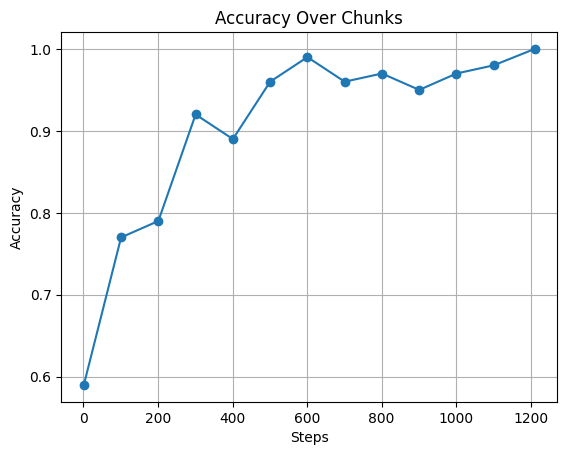

Total reward: 1085
Accuracy: 0.8959537572254336


In [12]:
import numpy as np
import pandas as pd
import scipy.stats as stats

class ContextualThompsonSampling:
    def __init__(self, n_arms, n_features, delta=0.5,
                 R=0.01, epsilon=0.5, random_state=456):
        self.n_arms = n_arms
        self.n_features = n_features
        self.random_state = random_state

        # 0 < delta < 1
        if not isinstance(delta, float):
            raise ValueError("delta should be float")
        elif (delta < 0) or (delta >= 1):
            raise ValueError("delta should be in (0, 1]")
        else:
            self.delta = delta

        # R > 0
        if not isinstance(R, float):
            raise ValueError("R should be float")
        elif R <= 0:
            raise ValueError("R should be positive")
        else:
            self.R = R

        # 0 < epsilon < 1
        if not isinstance(epsilon, float):
            raise ValueError("epsilon should be float")
        elif (epsilon < 0) or (epsilon > 1):
            raise ValueError("epsilon should be in (0, 1)")
        else:
            self.epsilon = epsilon

        self.A = [np.identity(n_features) for _ in range(n_arms)]
        self.b = [np.zeros(n_features) for _ in range(n_arms)]

    def select_arm(self, context):
        scores = np.zeros(self.n_arms)
        for arm in range(self.n_arms):
            A_inv = np.linalg.inv(self.A[arm])
            mu_hat = A_inv @ self.b[arm]
            v = self.R * np.sqrt(24 / self.epsilon * self.n_features * np.log(1 / self.delta))
            mu_tilde = np.random.multivariate_normal(mu_hat.flat, v**2 * (A_inv + A_inv.T) / 2)[..., np.newaxis]
            scores[arm] = context @ mu_tilde

        selected_arm = np.argmax(scores)
        return selected_arm

    def update(self, arm, context, reward):
        self.A[arm] += np.outer(context, context)
        self.b[arm] += reward * context
        
# Assume 'lightweight' is a pandas DataFrame containing your data
# Assume 'chosen_features' is defined as the list of features for the fighters
chosen_features = [
    "total_comp_time", "reach", "height", "age",
    "knockdowns", "sub_attempts", "reversals", "control",
    "takedowns_landed", "takedowns_attempts",
    "sig_strikes_landed", "sig_strikes_attempts",
    "total_strikes_landed", "total_strikes_attempts",
    "head_strikes_landed", "head_strikes_attempts",
    "body_strikes_landed", "body_strikes_attempts",
    "leg_strikes_landed", "leg_strikes_attempts",
    "distance_strikes_landed", "distance_strikes_attempts",
    "clinch_strikes_landed", "clinch_strikes_attempts",
    "ground_strikes_landed", "ground_strikes_attempts",
    "KO_losses", "days_since_last_comp", "lose_streak",
    "win_streak", "win_loss_ratio",
    "stamina", "num_fights", "trueskill", "elo"
]

# Ensure 'result' column exists and indicates the winner (1 for the winner, 0 for the loser)

num_fights = len(lightweight) // 2
num_features = len(chosen_features) * 2  # Features from both fighters

# Initialize variables to track accuracy in chunks
chunk_size = 100  # Define the size of each chunk for reporting accuracy
chunk_rewards = [0] * (num_fights // chunk_size + 1)  # List to hold rewards for each chunk
chunk_correct_predictions = [0] * (num_fights // chunk_size + 1)  # List to hold correct predictions count for each chunk

# Create an instance of the ContextualThompsonSampling class
cts = ContextualThompsonSampling(2, num_features)

total_reward = 0
correct_predictions = 0

# print("Timestep | Chosen Arm | Actual Winner | Reward")
for fight_index in range(num_fights):
    # Get the records for both fighters in the current fight
    fighter1_record = lightweight.iloc[fight_index * 2]
    fighter2_record = lightweight.iloc[fight_index * 2 + 1]

    # Convert features from both fighters to numeric types and handle non-numeric entries
    fighter1_features = pd.to_numeric(fighter1_record[chosen_features], errors='coerce').fillna(0)
    fighter2_features = pd.to_numeric(fighter2_record[chosen_features], errors='coerce').fillna(0)

    context = np.concatenate([fighter1_features, fighter2_features])
    
    # Use Contextual Thompson Sampling to recommend an arm (fighter)
    chosen_arm = cts.select_arm(context)

    # Determine the actual winner (arm 0 represents fighter 1 and arm 1 represents fighter 2)
    actual_winner = 0 if fighter1_record['result'] == 1 else 1
    
     # Reward is 1 if the chosen arm matches the actual winner, else 0
    reward = 1 if chosen_arm == actual_winner else 0

    # Update the model
    cts.update(chosen_arm, context, reward)
    
    # print(fight_index)
    
    # print("Fighter " + str(fighter1_record['fighter'] + " " + str(fighter1_record['result'])) + ", " + "Fighter " + str(fighter2_record['fighter'] + " " + str(fighter2_record['result'])))
    
    winning_fighter = "name"
    if actual_winner == 0:
        winning_fighter = fighter1_record['fighter']
    else:
        winning_fighter = fighter2_record['fighter']
        
    # print(f"Actual Winner: Fighter " + winning_fighter)
    
    # Determine the current chunk
    current_chunk = fight_index // chunk_size
    
    # Update rewards and correct predictions for the current chunk
    chunk_rewards[current_chunk] += reward
    if chosen_arm == actual_winner:
        chunk_correct_predictions[current_chunk] += 1
    
    # Print the timestep, rewards, and chosen arm
    # print(f"{fight_index+1:8} | {chosen_arm:11} | {actual_winner:14} | {reward:6}")
    
    # Track total reward and correct predictions
    total_reward += reward
    correct_predictions += (chosen_arm == actual_winner)

# Print accuracy for each chunk
for i in range(len(chunk_rewards)):
    if (i + 1) * chunk_size <= num_fights:
        print(f"Accuracy for steps {i * chunk_size + 1} - {(i + 1) * chunk_size}: {chunk_correct_predictions[i] / chunk_size}")
    else:  # Handle the last chunk which might be smaller than chunk_size
        print(f"Accuracy for steps {i * chunk_size + 1} - {num_fights}: {chunk_correct_predictions[i] / (num_fights - i * chunk_size)}")
        
import matplotlib.pyplot as plt

# Calculate the accuracy for each chunk
accuracies = [chunk_correct_predictions[i] / chunk_size if (i + 1) * chunk_size <= num_fights
              else chunk_correct_predictions[i] / (num_fights - i * chunk_size)
              for i in range(len(chunk_rewards))]

# Create x-axis values for the plot
x_values = [i * chunk_size + 1 if (i + 1) * chunk_size <= num_fights
            else num_fights
            for i in range(len(chunk_rewards))]

# Plot the line graph
plt.plot(x_values, accuracies, marker='o', linestyle='-')
plt.title('Accuracy Over Chunks')
plt.xlabel('Steps')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()
        
# Calculate accuracy
accuracy = correct_predictions / num_fights
print(f"Total reward: {total_reward}")
print(f"Accuracy: {accuracy}")

# Iterate through the 'alpha_values' value to find the best


Running with alpha = 1e-05
Accuracy for steps 1 - 100: 0.99
Accuracy for steps 101 - 200: 1.0
Accuracy for steps 201 - 300: 1.0
Accuracy for steps 301 - 400: 1.0
Accuracy for steps 401 - 500: 1.0
Accuracy for steps 501 - 600: 1.0
Accuracy for steps 601 - 700: 1.0
Accuracy for steps 701 - 800: 1.0
Accuracy for steps 801 - 900: 1.0
Accuracy for steps 901 - 1000: 1.0
Accuracy for steps 1001 - 1100: 1.0
Accuracy for steps 1101 - 1200: 1.0
Accuracy for steps 1201 - 1211: 1.0


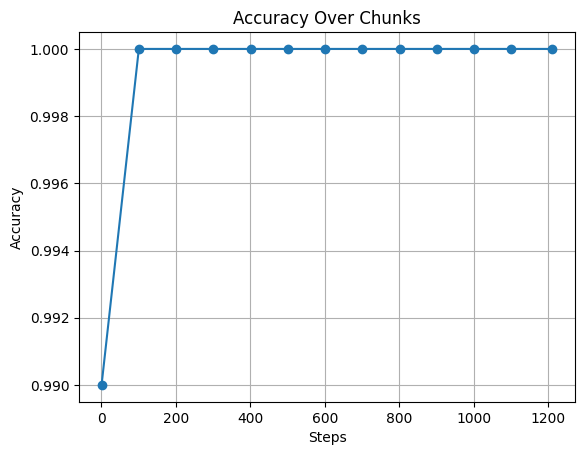

Total reward: 1210
Accuracy: 0.9991742361684558

Running with alpha = 0.0001
Accuracy for steps 1 - 100: 0.98
Accuracy for steps 101 - 200: 1.0
Accuracy for steps 201 - 300: 1.0
Accuracy for steps 301 - 400: 1.0
Accuracy for steps 401 - 500: 1.0
Accuracy for steps 501 - 600: 1.0
Accuracy for steps 601 - 700: 1.0
Accuracy for steps 701 - 800: 1.0
Accuracy for steps 801 - 900: 1.0
Accuracy for steps 901 - 1000: 1.0
Accuracy for steps 1001 - 1100: 1.0
Accuracy for steps 1101 - 1200: 1.0
Accuracy for steps 1201 - 1211: 1.0


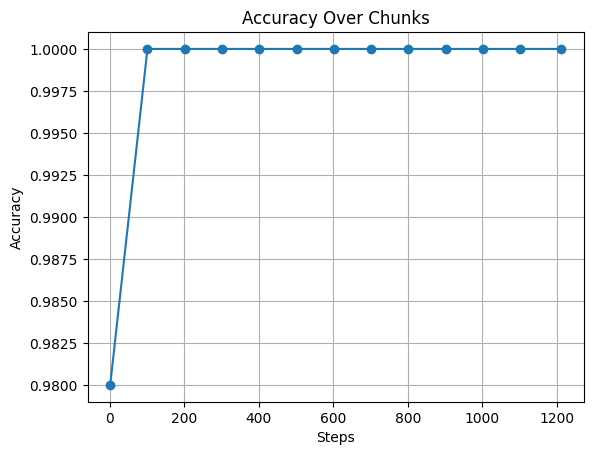

Total reward: 1209
Accuracy: 0.9983484723369116

Running with alpha = 0.001
Accuracy for steps 1 - 100: 0.71
Accuracy for steps 101 - 200: 0.89
Accuracy for steps 201 - 300: 0.94
Accuracy for steps 301 - 400: 0.81
Accuracy for steps 401 - 500: 0.84
Accuracy for steps 501 - 600: 0.84
Accuracy for steps 601 - 700: 0.88
Accuracy for steps 701 - 800: 0.88
Accuracy for steps 801 - 900: 0.92
Accuracy for steps 901 - 1000: 0.92
Accuracy for steps 1001 - 1100: 0.91
Accuracy for steps 1101 - 1200: 0.91
Accuracy for steps 1201 - 1211: 0.5454545454545454


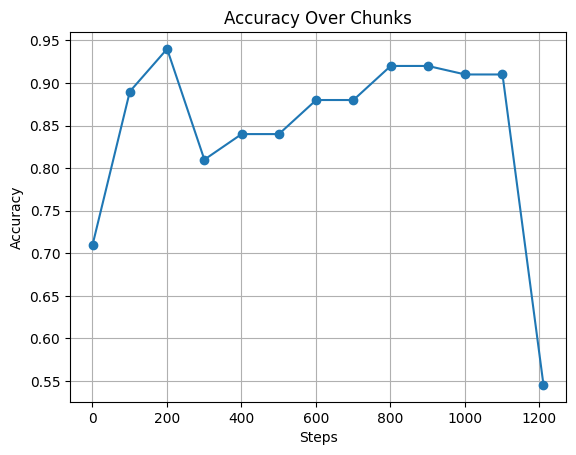

Total reward: 1051
Accuracy: 0.8678777869529315

Running with alpha = 0.01
Accuracy for steps 1 - 100: 0.71
Accuracy for steps 101 - 200: 0.89
Accuracy for steps 201 - 300: 0.94
Accuracy for steps 301 - 400: 0.81
Accuracy for steps 401 - 500: 0.84
Accuracy for steps 501 - 600: 0.84
Accuracy for steps 601 - 700: 0.88
Accuracy for steps 701 - 800: 0.88
Accuracy for steps 801 - 900: 0.92
Accuracy for steps 901 - 1000: 0.92
Accuracy for steps 1001 - 1100: 0.91
Accuracy for steps 1101 - 1200: 0.91
Accuracy for steps 1201 - 1211: 0.5454545454545454


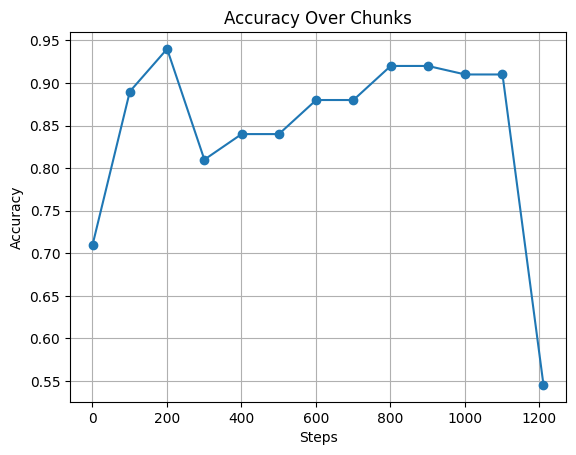

Total reward: 1051
Accuracy: 0.8678777869529315

Running with alpha = 0.1
Accuracy for steps 1 - 100: 0.71
Accuracy for steps 101 - 200: 0.89
Accuracy for steps 201 - 300: 0.94
Accuracy for steps 301 - 400: 0.8
Accuracy for steps 401 - 500: 0.84
Accuracy for steps 501 - 600: 0.84
Accuracy for steps 601 - 700: 0.88
Accuracy for steps 701 - 800: 0.88
Accuracy for steps 801 - 900: 0.92
Accuracy for steps 901 - 1000: 0.92
Accuracy for steps 1001 - 1100: 0.91
Accuracy for steps 1101 - 1200: 0.91
Accuracy for steps 1201 - 1211: 0.5454545454545454


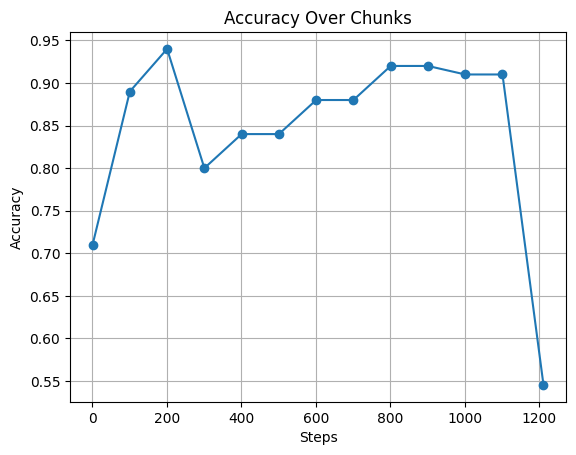

Total reward: 1050
Accuracy: 0.8670520231213873


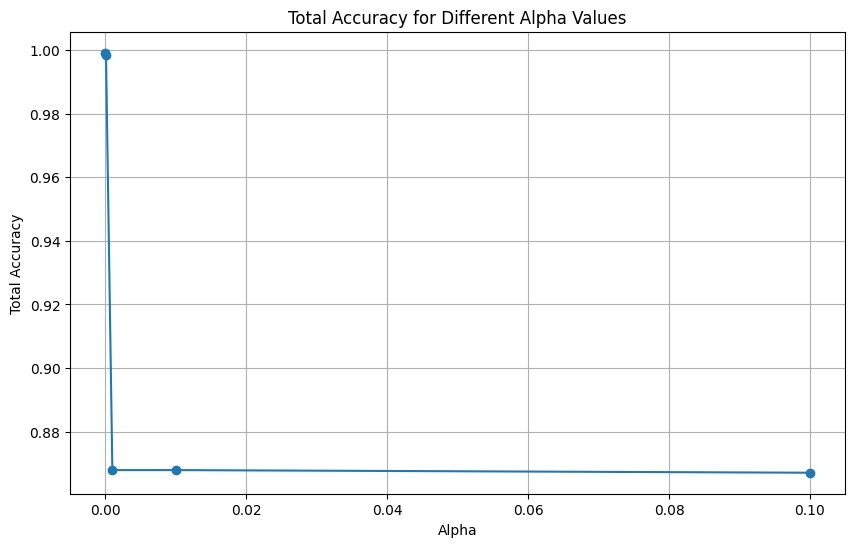

In [13]:
import numpy as np
import pandas as pd

class ModifiedWinLossLinUCB:
    def __init__(self, num_arms, num_features, alpha=0.1):
        self.num_arms = num_arms  # This is actually the number of fights, not fighters
        self.num_features = num_features
        self.alpha = alpha
        self.A = [np.identity(num_features) for _ in range(self.num_arms)]  # One A matrix per fight
        self.b = [np.zeros((num_features, 1)) for _ in range(self.num_arms)]  # One b vector per fight

    def recommend(self, context):
        chosen_arm = None
        max_ucb = float('-inf')

        for arm in [0, 1]:  # Two possible arms: fighter 1 wins or fighter 2 wins
            x = context.reshape((self.num_features, 1))
            A_inv = np.linalg.inv(self.A[arm])
            theta = np.dot(A_inv, self.b[arm])
            ucb_value = np.dot(x.T, np.dot(A_inv, x))
            ucb = np.dot(theta.T, x) + self.alpha * np.sqrt(ucb_value.item())

            if ucb > max_ucb:
                max_ucb = ucb
                chosen_arm = arm

        return chosen_arm


    def update(self, fight_index, context, reward):
        x = context.reshape((self.num_features, 1))
        self.A[fight_index] += np.dot(x, x.T)
        self.b[fight_index] += reward * x
        
chosen_features = [
    "total_comp_time", "reach", "height", "age",
    "knockdowns", "sub_attempts", "reversals", "control",
    "takedowns_landed", "takedowns_attempts",
    "sig_strikes_landed", "sig_strikes_attempts",
    "total_strikes_landed", "total_strikes_attempts",
    "head_strikes_landed", "head_strikes_attempts",
    "body_strikes_landed", "body_strikes_attempts",
    "leg_strikes_landed", "leg_strikes_attempts",
    "distance_strikes_landed", "distance_strikes_attempts",
    "clinch_strikes_landed", "clinch_strikes_attempts",
    "ground_strikes_landed", "ground_strikes_attempts",
    "KO_losses", "days_since_last_comp", "lose_streak",
    "win_streak", "win_loss_ratio",
    "stamina", "num_fights", "trueskill", "elo"
]

num_fights = len(lightweight) // 2
num_features = len(chosen_features) * 2  # Features from both fighters

#track accuracy in chunks
chunk_size = 100  # Define the size of each chunk
chunk_rewards = [0] * (num_fights // chunk_size + 1)  # List to hold rewards for each chunk
chunk_correct_predictions = [0] * (num_fights // chunk_size + 1)  # List to hold correct predictions count for each chunk

bandit = ModifiedWinLossLinUCB(num_fights, num_features)

# List to store total accuracies for each epsilon value
total_accuracies = []

total_reward = 0
correct_predictions = 0
alpha_values = [0.00001, 0.0001, 0.001, 0.01, 0.1]  # Add more alpha values as needed

for alpha in alpha_values:
    print(f"\nRunning with alpha = {alpha}")

    # Initialize the bandit with the current alpha
    bandit = ModifiedWinLossLinUCB(num_fights, num_features, alpha)

    total_reward = 0
    correct_predictions = 0

    chunk_rewards = [0] * (num_fights // chunk_size + 1)
    chunk_correct_predictions = [0] * (num_fights // chunk_size + 1)
    
    # print("Timestep | Chosen Arm | Actual Winner | Reward")
    for fight_index in range(num_fights):
        # Get the records for both fighters in the current fight
        fighter1_record = lightweight.iloc[fight_index * 2]
        fighter2_record = lightweight.iloc[fight_index * 2 + 1]

        # ensure features are numeric types
        fighter1_features = pd.to_numeric(fighter1_record[chosen_features], errors='coerce').fillna(0)
        fighter2_features = pd.to_numeric(fighter2_record[chosen_features], errors='coerce').fillna(0)

        context = np.concatenate([fighter1_features, fighter2_features])
        # Predict the winner using the combined context
        chosen_arm = bandit.recommend(context)  # 0 or 1

        # Determine the actual winner (arm 0 represents fighter 1 and arm 1 represents fighter 2)
        actual_winner = 0 if fighter1_record['result'] == 1 else 1

        # print(fight_index)
        # print("Fighter " + str(fighter1_record['fighter'] + " " + str(fighter1_record['result'])) + ", " + "Fighter " + str(fighter2_record['fighter'] + " " + str(fighter2_record['result'])))

        winning_fighter = "name"
        if actual_winner == 0:
            winning_fighter = fighter1_record['fighter']
        else:
            winning_fighter = fighter2_record['fighter']
        # print(f"Actual Winner: Fighter " + winning_fighter)

        # Update the bandit with the outcome of the fight
        reward = 1 if chosen_arm == actual_winner else 0
        bandit.update(fight_index, context, reward)

        # Determine the current chunk
        current_chunk = fight_index // chunk_size

        # Update rewards and correct predictions for the current chunk
        chunk_rewards[current_chunk] += reward
        if chosen_arm == actual_winner:
            chunk_correct_predictions[current_chunk] += 1

        # Print
        # print(f"{fight_index+1:8} | {chosen_arm:11} | {actual_winner:14} | {reward:6}")

        # Track total reward and correct predictions
        total_reward += reward
        correct_predictions += (chosen_arm == actual_winner)
        
    # Calculate accuracy
    accuracy = correct_predictions / num_fights

    # Append accuracy to the list
    total_accuracies.append(accuracy)

    # Print accuracy for each chunk
    for i in range(len(chunk_rewards)):
        if (i + 1) * chunk_size <= num_fights:
            print(f"Accuracy for steps {i * chunk_size + 1} - {(i + 1) * chunk_size}: {chunk_correct_predictions[i] / chunk_size}")
        else:  # Handle the last chunk
            print(f"Accuracy for steps {i * chunk_size + 1} - {num_fights}: {chunk_correct_predictions[i] / (num_fights - i * chunk_size)}")

    import matplotlib.pyplot as plt

    # Calculate the accuracy for each chunk
    accuracies = [chunk_correct_predictions[i] / chunk_size if (i + 1) * chunk_size <= num_fights
                  else chunk_correct_predictions[i] / (num_fights - i * chunk_size)
                  for i in range(len(chunk_rewards))]

    # Create x-axis values for the plot
    x_values = [i * chunk_size + 1 if (i + 1) * chunk_size <= num_fights
                else num_fights
                for i in range(len(chunk_rewards))]

    # Plot the line graph
    plt.plot(x_values, accuracies, marker='o', linestyle='-')
    plt.title('Accuracy Over Chunks')
    plt.xlabel('Steps')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.show()

    # Calculate accuracy
    accuracy = correct_predictions / num_fights
    print(f"Total reward: {total_reward}")
    print(f"Accuracy: {accuracy}")
    
# Plot total accuracies for each epsilon value
# Plot total accuracies for each alpha value
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, total_accuracies, marker='o', linestyle='-')
plt.title('Total Accuracy for Different Alpha Values')
plt.xlabel('Alpha')
plt.ylabel('Total Accuracy')
plt.grid(True)
plt.show()

# Contextual thompson sampling

## Iterate through the 'delta_values' value to find the best

Accuracy for steps 1 - 100: 0.59
Accuracy for steps 101 - 200: 0.67
Accuracy for steps 201 - 300: 0.75
Accuracy for steps 301 - 400: 0.81
Accuracy for steps 401 - 500: 0.86
Accuracy for steps 501 - 600: 0.84
Accuracy for steps 601 - 700: 0.92
Accuracy for steps 701 - 800: 0.89
Accuracy for steps 801 - 900: 0.97
Accuracy for steps 901 - 1000: 0.94
Accuracy for steps 1001 - 1100: 0.96
Accuracy for steps 1101 - 1200: 0.95
Accuracy for steps 1201 - 1211: 0.8181818181818182
Total reward for delta=0.1: 1024
Accuracy for delta=0.1: 0.8455821635012386


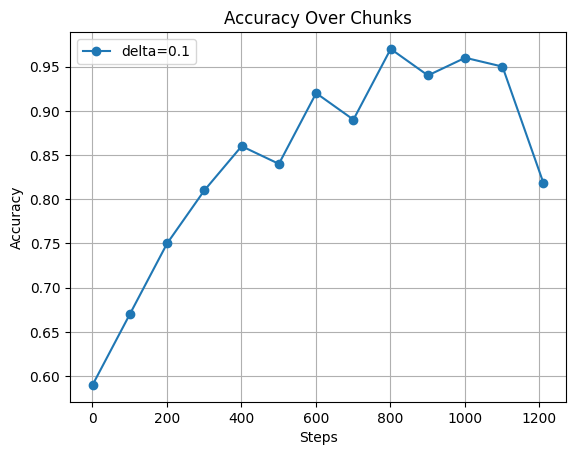

Accuracy for steps 1 - 100: 0.56
Accuracy for steps 101 - 200: 0.68
Accuracy for steps 201 - 300: 0.82
Accuracy for steps 301 - 400: 0.83
Accuracy for steps 401 - 500: 0.88
Accuracy for steps 501 - 600: 0.96
Accuracy for steps 601 - 700: 0.9
Accuracy for steps 701 - 800: 0.95
Accuracy for steps 801 - 900: 0.92
Accuracy for steps 901 - 1000: 0.96
Accuracy for steps 1001 - 1100: 0.91
Accuracy for steps 1101 - 1200: 0.93
Accuracy for steps 1201 - 1211: 1.0
Total reward for delta=0.2: 1041
Accuracy for delta=0.2: 0.8596201486374897


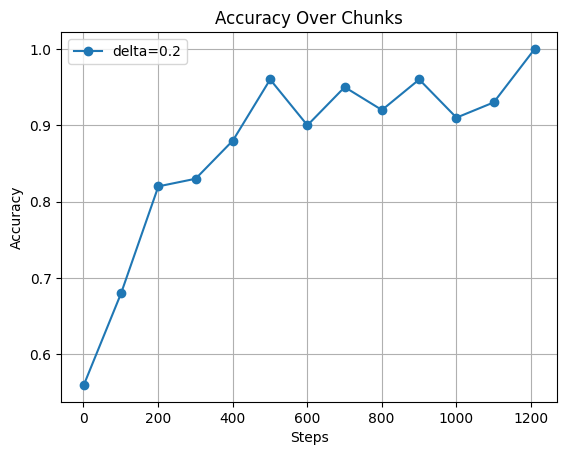

Accuracy for steps 1 - 100: 0.57
Accuracy for steps 101 - 200: 0.71
Accuracy for steps 201 - 300: 0.83
Accuracy for steps 301 - 400: 0.88
Accuracy for steps 401 - 500: 0.95
Accuracy for steps 501 - 600: 0.95
Accuracy for steps 601 - 700: 0.92
Accuracy for steps 701 - 800: 0.97
Accuracy for steps 801 - 900: 0.93
Accuracy for steps 901 - 1000: 0.94
Accuracy for steps 1001 - 1100: 0.95
Accuracy for steps 1101 - 1200: 0.93
Accuracy for steps 1201 - 1211: 1.0
Total reward for delta=0.4: 1064
Accuracy for delta=0.4: 0.8786127167630058


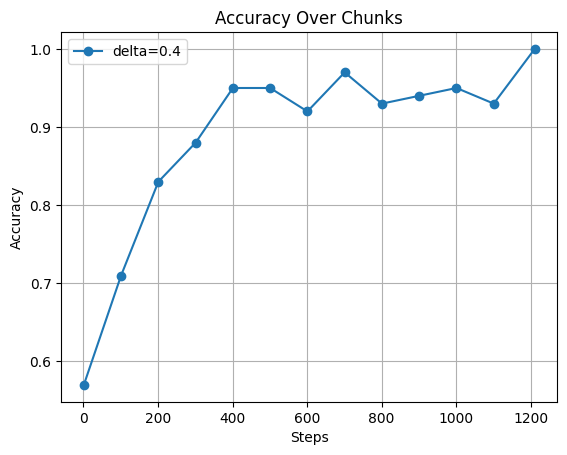

Accuracy for steps 1 - 100: 0.54
Accuracy for steps 101 - 200: 0.82
Accuracy for steps 201 - 300: 0.82
Accuracy for steps 301 - 400: 0.91
Accuracy for steps 401 - 500: 0.93
Accuracy for steps 501 - 600: 0.94
Accuracy for steps 601 - 700: 0.94
Accuracy for steps 701 - 800: 0.96
Accuracy for steps 801 - 900: 0.95
Accuracy for steps 901 - 1000: 0.99
Accuracy for steps 1001 - 1100: 0.97
Accuracy for steps 1101 - 1200: 0.98
Accuracy for steps 1201 - 1211: 1.0
Total reward for delta=0.6: 1086
Accuracy for delta=0.6: 0.8967795210569777


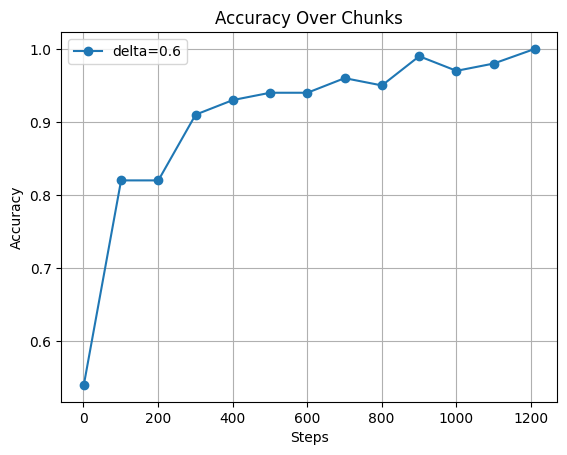

Accuracy for steps 1 - 100: 0.6
Accuracy for steps 101 - 200: 0.83
Accuracy for steps 201 - 300: 0.93
Accuracy for steps 301 - 400: 0.91
Accuracy for steps 401 - 500: 0.96
Accuracy for steps 501 - 600: 0.98
Accuracy for steps 601 - 700: 0.99
Accuracy for steps 701 - 800: 0.95
Accuracy for steps 801 - 900: 0.98
Accuracy for steps 901 - 1000: 0.99
Accuracy for steps 1001 - 1100: 0.98
Accuracy for steps 1101 - 1200: 0.98
Accuracy for steps 1201 - 1211: 1.0
Total reward for delta=0.8: 1119
Accuracy for delta=0.8: 0.9240297274979355


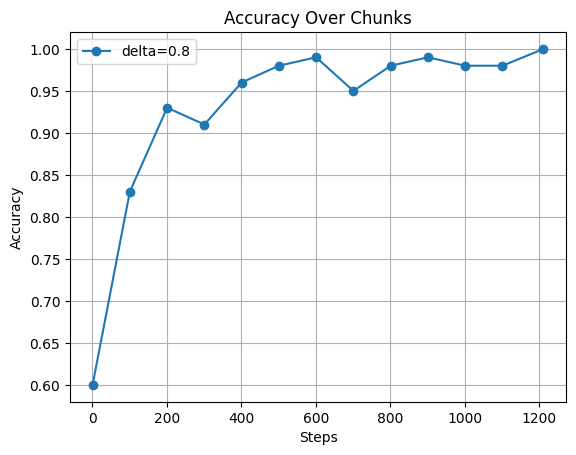

Accuracy for steps 1 - 100: 0.79
Accuracy for steps 101 - 200: 0.96
Accuracy for steps 201 - 300: 0.96
Accuracy for steps 301 - 400: 0.99
Accuracy for steps 401 - 500: 0.99
Accuracy for steps 501 - 600: 1.0
Accuracy for steps 601 - 700: 1.0
Accuracy for steps 701 - 800: 0.99
Accuracy for steps 801 - 900: 1.0
Accuracy for steps 901 - 1000: 0.99
Accuracy for steps 1001 - 1100: 1.0
Accuracy for steps 1101 - 1200: 1.0
Accuracy for steps 1201 - 1211: 1.0
Total reward for delta=0.999: 1178
Accuracy for delta=0.999: 0.9727497935590421


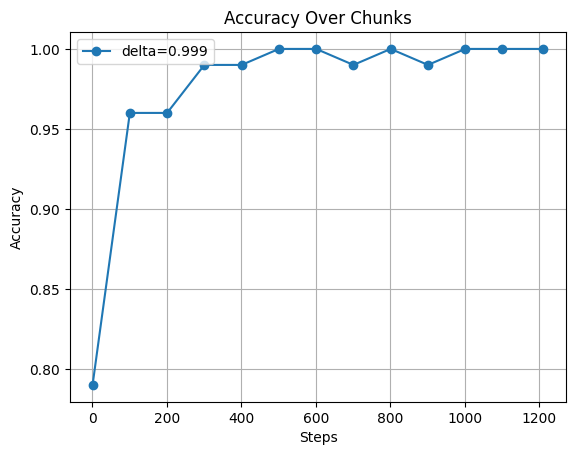

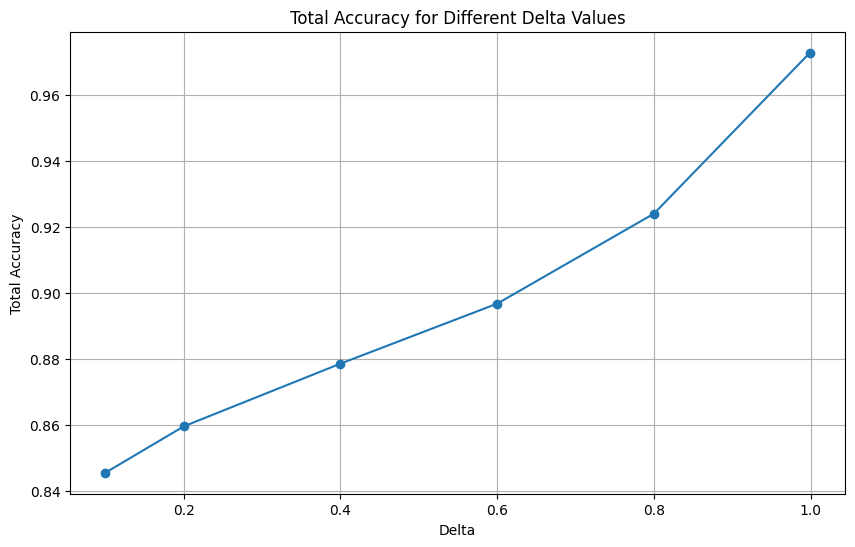

In [14]:
import numpy as np
import pandas as pd
import scipy.stats as stats

class ContextualThompsonSampling:
    def __init__(self, n_arms, n_features, delta=0.5,
                 R=0.01, epsilon=0.5, random_state=456):
        self.n_arms = n_arms
        self.n_features = n_features
        self.random_state = random_state
        self.n_features = n_features

        # 0 < delta < 1
        if not isinstance(delta, float):
            raise ValueError("delta should be float")
        elif (delta < 0) or (delta >= 1):
            raise ValueError("delta should be in (0, 1]")
        else:
            self.delta = delta

        # R > 0
        if not isinstance(R, float):
            raise ValueError("R should be float")
        elif R <= 0:
            raise ValueError("R should be positive")
        else:
            self.R = R

        # 0 < epsilon < 1
        if not isinstance(epsilon, float):
            raise ValueError("epsilon should be float")
        elif (epsilon < 0) or (epsilon > 1):
            raise ValueError("epsilon should be in (0, 1)")
        else:
            self.epsilon = epsilon

        self.A = [np.identity(n_features) for _ in range(n_arms)]
        self.b = [np.zeros(n_features) for _ in range(n_arms)]

    def select_arm(self, context):
        scores = np.zeros(self.n_arms)
        for arm in range(self.n_arms):
            A_inv = np.linalg.inv(self.A[arm])
            mu_hat = A_inv @ self.b[arm]
            v = self.R * np.sqrt(24 / self.epsilon
                             * self.n_features
                             * np.log(1 / self.delta))
            mu_tilde = np.random.multivariate_normal(
            mu_hat.flat, v**2 * A_inv)[..., np.newaxis]

            scores[arm] = context @ mu_tilde
        
        selected_arm = np.argmax(scores)
        return selected_arm

    def update(self, arm, context, reward):
        self.A[arm] += np.outer(context, context)
        self.b[arm] += reward * context
        
# Assume 'lightweight' is a pandas DataFrame containing your data
# Assume 'chosen_features' is defined as the list of features for the fighters
chosen_features = [
    "total_comp_time", "reach", "height", "age",
    "knockdowns", "sub_attempts", "reversals", "control",
    "takedowns_landed", "takedowns_attempts",
    "sig_strikes_landed", "sig_strikes_attempts",
    "total_strikes_landed", "total_strikes_attempts",
    "head_strikes_landed", "head_strikes_attempts",
    "body_strikes_landed", "body_strikes_attempts",
    "leg_strikes_landed", "leg_strikes_attempts",
    "distance_strikes_landed", "distance_strikes_attempts",
    "clinch_strikes_landed", "clinch_strikes_attempts",
    "ground_strikes_landed", "ground_strikes_attempts",
    "KO_losses", "days_since_last_comp", "lose_streak",
    "win_streak", "win_loss_ratio",
    "stamina", "num_fights", "trueskill", "elo"
]
# Define a list of delta values to iterate over
delta_values = [0.1, 0.2, 0.4, 0.6, 0.8, 0.999]

# Ensure 'result' column exists and indicates the winner (1 for the winner, 0 for the loser)
num_fights = len(lightweight) // 2
num_features = len(chosen_features) * 2  # Features from both fighters

# Initialize variables to track accuracy in chunks
chunk_size = 100  # Define the size of each chunk for reporting accuracy
chunk_rewards = [0] * (num_fights // chunk_size + 1)  # List to hold rewards for each chunk
chunk_correct_predictions = [0] * (num_fights // chunk_size + 1)  # List to hold correct predictions count for each chunk

# List to store total accuracies for each epsilon value
total_accuracies = []

# Iterate over delta values
for delta_value in delta_values:
    # Create an instance of the ContextualThompsonSampling class with the current delta value
    cts = ContextualThompsonSampling(2, num_features, delta=delta_value)

    # Initialize variables to track accuracy in chunks for the current delta
    chunk_rewards = [0] * (num_fights // chunk_size + 1)
    chunk_correct_predictions = [0] * (num_fights // chunk_size + 1)
    total_reward = 0
    correct_predictions = 0

    # print("Timestep | Chosen Arm | Actual Winner | Reward")
    for fight_index in range(num_fights):
        # Get the records for both fighters in the current fight
        fighter1_record = lightweight.iloc[fight_index * 2]
        fighter2_record = lightweight.iloc[fight_index * 2 + 1]

        # Convert features from both fighters to numeric types and handle non-numeric entries
        fighter1_features = pd.to_numeric(fighter1_record[chosen_features], errors='coerce').fillna(0)
        fighter2_features = pd.to_numeric(fighter2_record[chosen_features], errors='coerce').fillna(0)

        context = np.concatenate([fighter1_features, fighter2_features])

        # Use Contextual Thompson Sampling to recommend an arm (fighter)
        chosen_arm = cts.select_arm(context)

        # Determine the actual winner (arm 0 represents fighter 1 and arm 1 represents fighter 2)
        actual_winner = 0 if fighter1_record['result'] == 1 else 1

         # Reward is 1 if the chosen arm matches the actual winner, else 0
        reward = 1 if chosen_arm == actual_winner else 0

        # Update the model
        cts.update(chosen_arm, context, reward)

        # print(fight_index)

        # print("Fighter " + str(fighter1_record['fighter'] + " " + str(fighter1_record['result'])) + ", " + "Fighter " + str(fighter2_record['fighter'] + " " + str(fighter2_record['result'])))

        winning_fighter = "name"
        if actual_winner == 0:
            winning_fighter = fighter1_record['fighter']
        else:
            winning_fighter = fighter2_record['fighter']

        # print(f"Actual Winner: Fighter " + winning_fighter)

        # Determine the current chunk
        current_chunk = fight_index // chunk_size

        # Update rewards and correct predictions for the current chunk
        chunk_rewards[current_chunk] += reward
        if chosen_arm == actual_winner:
            chunk_correct_predictions[current_chunk] += 1

        # Print the timestep, rewards, and chosen arm
        # print(f"{fight_index+1:8} | {chosen_arm:11} | {actual_winner:14} | {reward:6}")

        # Track total reward and correct predictions
        total_reward += reward
        correct_predictions += (chosen_arm == actual_winner)
        
    # Calculate accuracy
    accuracy = correct_predictions / num_fights

    # Append accuracy to the list
    total_accuracies.append(accuracy)
    
    # Print accuracy for each chunk
    for i in range(len(chunk_rewards)):
        if (i + 1) * chunk_size <= num_fights:
            print(f"Accuracy for steps {i * chunk_size + 1} - {(i + 1) * chunk_size}: {chunk_correct_predictions[i] / chunk_size}")
        else:  # Handle the last chunk which might be smaller than chunk_size
            print(f"Accuracy for steps {i * chunk_size + 1} - {num_fights}: {chunk_correct_predictions[i] / (num_fights - i * chunk_size)}")

    # Calculate accuracy
    accuracy = correct_predictions / num_fights
    print(f"Total reward for delta={delta_value}: {total_reward}")
    print(f"Accuracy for delta={delta_value}: {accuracy}") # Plotting (optional)
    x_values = [i * chunk_size + 1 if (i + 1) * chunk_size <= num_fights
                else num_fights
                for i in range(len(chunk_rewards))]
    accuracies = [chunk_correct_predictions[i] / chunk_size if (i + 1) * chunk_size <= num_fights
                  else chunk_correct_predictions[i] / (num_fights - i * chunk_size)
                  for i in range(len(chunk_rewards))]
    plt.plot(x_values, accuracies, marker='o', linestyle='-', label=f'delta={delta_value}')
    # Show the plot
    plt.title('Accuracy Over Chunks')
    plt.xlabel('Steps')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()
    
# Plot total accuracies for each epsilon value
plt.figure(figsize=(10, 6))
plt.plot(delta_values, total_accuracies, marker='o', linestyle='-')
plt.title('Total Accuracy for Different Delta Values')
plt.xlabel('Delta')
plt.ylabel('Total Accuracy')
plt.grid(True)
plt.show()

# Iterate through the 'epsilon_values' value to find the best

Epsilon=0.1: Accuracy for steps 1 - 100: 0.79
Epsilon=0.1: Accuracy for steps 101 - 200: 0.96
Epsilon=0.1: Accuracy for steps 201 - 300: 0.96
Epsilon=0.1: Accuracy for steps 301 - 400: 0.99
Epsilon=0.1: Accuracy for steps 401 - 500: 0.99
Epsilon=0.1: Accuracy for steps 501 - 600: 1.0
Epsilon=0.1: Accuracy for steps 601 - 700: 1.0
Epsilon=0.1: Accuracy for steps 701 - 800: 0.99
Epsilon=0.1: Accuracy for steps 801 - 900: 1.0
Epsilon=0.1: Accuracy for steps 901 - 1000: 0.99
Epsilon=0.1: Accuracy for steps 1001 - 1100: 1.0
Epsilon=0.1: Accuracy for steps 1101 - 1200: 1.0
Epsilon=0.1: Accuracy for steps 1201 - 1211: 1.0
Total reward for epsilon=0.1: 987
Accuracy for epsilon=0.1: 0.815028901734104


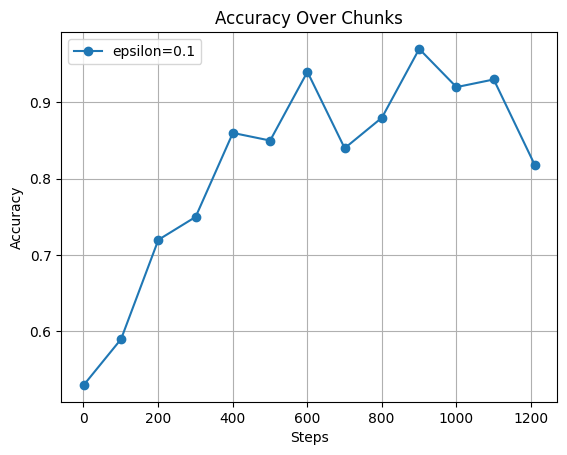

Epsilon=0.2: Accuracy for steps 1 - 100: 0.53
Epsilon=0.2: Accuracy for steps 101 - 200: 0.59
Epsilon=0.2: Accuracy for steps 201 - 300: 0.72
Epsilon=0.2: Accuracy for steps 301 - 400: 0.75
Epsilon=0.2: Accuracy for steps 401 - 500: 0.86
Epsilon=0.2: Accuracy for steps 501 - 600: 0.85
Epsilon=0.2: Accuracy for steps 601 - 700: 0.94
Epsilon=0.2: Accuracy for steps 701 - 800: 0.84
Epsilon=0.2: Accuracy for steps 801 - 900: 0.88
Epsilon=0.2: Accuracy for steps 901 - 1000: 0.97
Epsilon=0.2: Accuracy for steps 1001 - 1100: 0.92
Epsilon=0.2: Accuracy for steps 1101 - 1200: 0.93
Epsilon=0.2: Accuracy for steps 1201 - 1211: 0.8181818181818182
Total reward for epsilon=0.2: 1048
Accuracy for epsilon=0.2: 0.8654004954582989


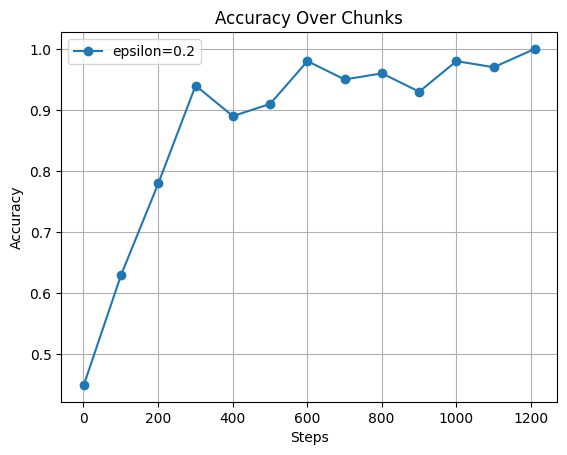

Epsilon=0.4: Accuracy for steps 1 - 100: 0.45
Epsilon=0.4: Accuracy for steps 101 - 200: 0.63
Epsilon=0.4: Accuracy for steps 201 - 300: 0.78
Epsilon=0.4: Accuracy for steps 301 - 400: 0.94
Epsilon=0.4: Accuracy for steps 401 - 500: 0.89
Epsilon=0.4: Accuracy for steps 501 - 600: 0.91
Epsilon=0.4: Accuracy for steps 601 - 700: 0.98
Epsilon=0.4: Accuracy for steps 701 - 800: 0.95
Epsilon=0.4: Accuracy for steps 801 - 900: 0.96
Epsilon=0.4: Accuracy for steps 901 - 1000: 0.93
Epsilon=0.4: Accuracy for steps 1001 - 1100: 0.98
Epsilon=0.4: Accuracy for steps 1101 - 1200: 0.97
Epsilon=0.4: Accuracy for steps 1201 - 1211: 1.0
Total reward for epsilon=0.4: 1074
Accuracy for epsilon=0.4: 0.8868703550784476


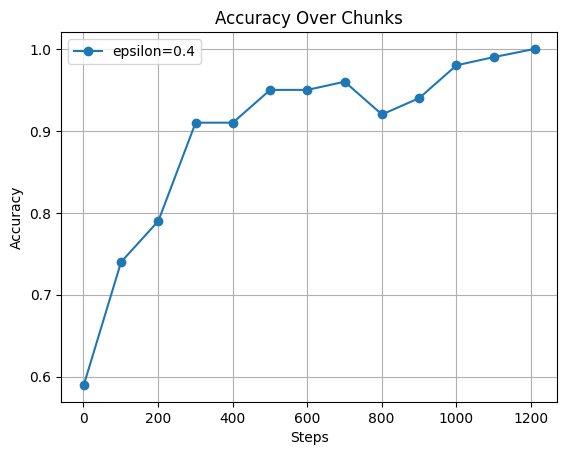

Epsilon=0.6: Accuracy for steps 1 - 100: 0.59
Epsilon=0.6: Accuracy for steps 101 - 200: 0.74
Epsilon=0.6: Accuracy for steps 201 - 300: 0.79
Epsilon=0.6: Accuracy for steps 301 - 400: 0.91
Epsilon=0.6: Accuracy for steps 401 - 500: 0.91
Epsilon=0.6: Accuracy for steps 501 - 600: 0.95
Epsilon=0.6: Accuracy for steps 601 - 700: 0.95
Epsilon=0.6: Accuracy for steps 701 - 800: 0.96
Epsilon=0.6: Accuracy for steps 801 - 900: 0.92
Epsilon=0.6: Accuracy for steps 901 - 1000: 0.94
Epsilon=0.6: Accuracy for steps 1001 - 1100: 0.98
Epsilon=0.6: Accuracy for steps 1101 - 1200: 0.99
Epsilon=0.6: Accuracy for steps 1201 - 1211: 1.0
Total reward for epsilon=0.6: 1089
Accuracy for epsilon=0.6: 0.8992568125516103


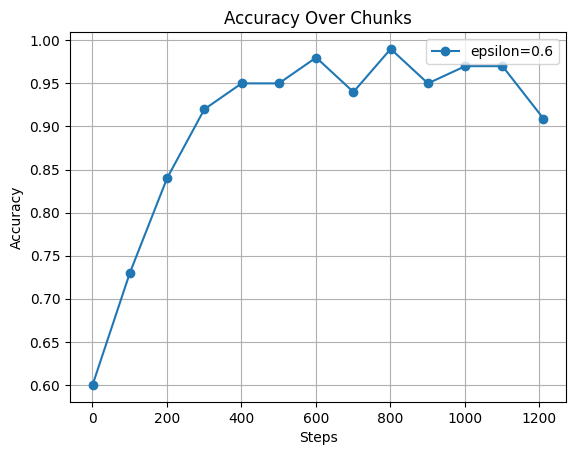

Epsilon=0.8: Accuracy for steps 1 - 100: 0.6
Epsilon=0.8: Accuracy for steps 101 - 200: 0.73
Epsilon=0.8: Accuracy for steps 201 - 300: 0.84
Epsilon=0.8: Accuracy for steps 301 - 400: 0.92
Epsilon=0.8: Accuracy for steps 401 - 500: 0.95
Epsilon=0.8: Accuracy for steps 501 - 600: 0.95
Epsilon=0.8: Accuracy for steps 601 - 700: 0.98
Epsilon=0.8: Accuracy for steps 701 - 800: 0.94
Epsilon=0.8: Accuracy for steps 801 - 900: 0.99
Epsilon=0.8: Accuracy for steps 901 - 1000: 0.95
Epsilon=0.8: Accuracy for steps 1001 - 1100: 0.97
Epsilon=0.8: Accuracy for steps 1101 - 1200: 0.97
Epsilon=0.8: Accuracy for steps 1201 - 1211: 0.9090909090909091
Total reward for epsilon=0.8: 1097
Accuracy for epsilon=0.8: 0.9058629232039637


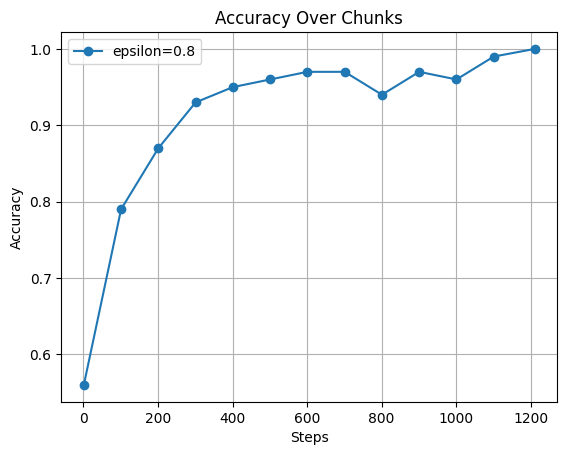

Epsilon=0.99: Accuracy for steps 1 - 100: 0.56
Epsilon=0.99: Accuracy for steps 101 - 200: 0.79
Epsilon=0.99: Accuracy for steps 201 - 300: 0.87
Epsilon=0.99: Accuracy for steps 301 - 400: 0.93
Epsilon=0.99: Accuracy for steps 401 - 500: 0.95
Epsilon=0.99: Accuracy for steps 501 - 600: 0.96
Epsilon=0.99: Accuracy for steps 601 - 700: 0.97
Epsilon=0.99: Accuracy for steps 701 - 800: 0.97
Epsilon=0.99: Accuracy for steps 801 - 900: 0.94
Epsilon=0.99: Accuracy for steps 901 - 1000: 0.97
Epsilon=0.99: Accuracy for steps 1001 - 1100: 0.96
Epsilon=0.99: Accuracy for steps 1101 - 1200: 0.99
Epsilon=0.99: Accuracy for steps 1201 - 1211: 1.0
Total reward for epsilon=0.99: 1106
Accuracy for epsilon=0.99: 0.9132947976878613


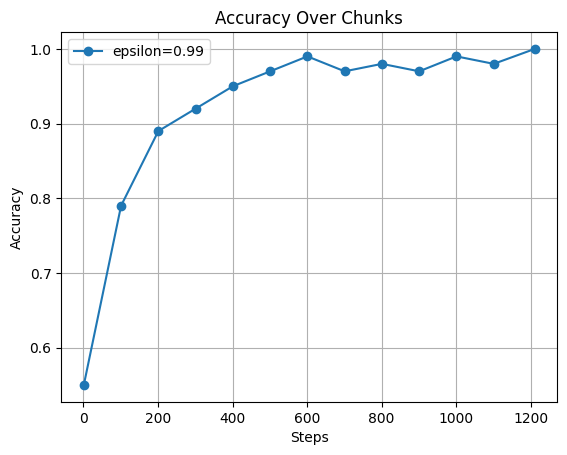

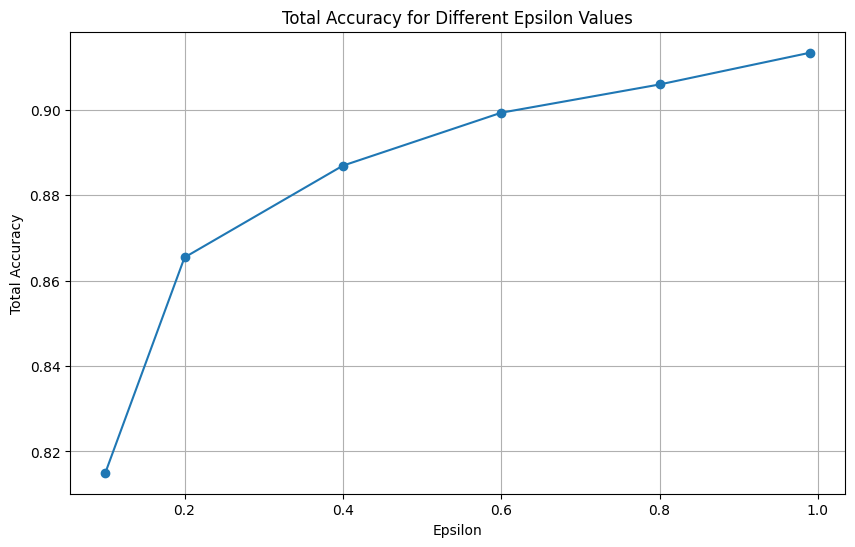

In [15]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

class ContextualThompsonSampling:
    def __init__(self, n_arms, n_features, delta=0.5,
                 R=0.01, epsilon=0.5, random_state=456):
        self.n_arms = n_arms
        self.n_features = n_features
        self.random_state = random_state
        self.n_features = n_features

        # 0 < delta < 1
        if not isinstance(delta, float):
            raise ValueError("delta should be float")
        elif (delta < 0) or (delta >= 1):
            raise ValueError("delta should be in (0, 1]")
        else:
            self.delta = delta

        # R > 0
        if not isinstance(R, float):
            raise ValueError("R should be float")
        elif R <= 0:
            raise ValueError("R should be positive")
        else:
            self.R = R

        # 0 < epsilon < 1
        if not isinstance(epsilon, float):
            raise ValueError("epsilon should be float")
        elif (epsilon < 0) or (epsilon > 1):
            raise ValueError("epsilon should be in (0, 1)")
        else:
            self.epsilon = epsilon

        self.A = [np.identity(n_features) for _ in range(n_arms)]
        self.b = [np.zeros(n_features) for _ in range(n_arms)]

    def select_arm(self, context):
        scores = np.zeros(self.n_arms)
        for arm in range(self.n_arms):
            A_inv = np.linalg.inv(self.A[arm])
            mu_hat = A_inv @ self.b[arm]
            v = self.R * np.sqrt(24 / self.epsilon
                             * self.n_features
                             * np.log(1 / self.delta))
            mu_tilde = np.random.multivariate_normal(
            mu_hat.flat, v**2 * A_inv)[..., np.newaxis]

            scores[arm] = context @ mu_tilde
        
        selected_arm = np.argmax(scores)
        return selected_arm

    def update(self, arm, context, reward):
        self.A[arm] += np.outer(context, context)
        self.b[arm] += reward * context
        
# Assume 'lightweight' is a pandas DataFrame containing your data
# Assume 'chosen_features' is defined as the list of features for the fighters
chosen_features = [
    "total_comp_time", "reach", "height", "age",
    "knockdowns", "sub_attempts", "reversals", "control",
    "takedowns_landed", "takedowns_attempts",
    "sig_strikes_landed", "sig_strikes_attempts",
    "total_strikes_landed", "total_strikes_attempts",
    "head_strikes_landed", "head_strikes_attempts",
    "body_strikes_landed", "body_strikes_attempts",
    "leg_strikes_landed", "leg_strikes_attempts",
    "distance_strikes_landed", "distance_strikes_attempts",
    "clinch_strikes_landed", "clinch_strikes_attempts",
    "ground_strikes_landed", "ground_strikes_attempts",
    "KO_losses", "days_since_last_comp", "lose_streak",
    "win_streak", "win_loss_ratio",
    "stamina", "num_fights", "trueskill", "elo"
]

# List of epsilon values to iterate over
epsilon_values = [0.1, 0.2, 0.4, 0.6, 0.8, 0.99]

# Ensure 'result' column exists and indicates the winner (1 for the winner, 0 for the loser)
num_fights = len(lightweight) // 2
num_features = len(chosen_features) * 2  # Features from both fighters

# Initialize variables to track accuracy in chunks
chunk_size = 100  # Define the size of each chunk for reporting accuracy
chunk_rewards = [0] * (num_fights // chunk_size + 1)  # List to hold rewards for each chunk
chunk_correct_predictions = [0] * (num_fights // chunk_size + 1)  # List to hold correct predictions count for each chunk

# List to store total accuracies for each epsilon value
total_accuracies = []

# Iterate over epsilon values
for epsilon in epsilon_values:
    # Create an instance of the ContextualThompsonSampling class with the current epsilon
    cts = ContextualThompsonSampling(2, num_features, epsilon=epsilon)

    # Initialize variables to track accuracy in chunks for the current delta
    chunk_rewards = [0] * (num_fights // chunk_size + 1)
    chunk_correct_predictions = [0] * (num_fights // chunk_size + 1)
    total_reward = 0
    correct_predictions = 0

    # print("Timestep | Chosen Arm | Actual Winner | Reward")
    for fight_index in range(num_fights):
        # Get the records for both fighters in the current fight
        fighter1_record = lightweight.iloc[fight_index * 2]
        fighter2_record = lightweight.iloc[fight_index * 2 + 1]

        # Convert features from both fighters to numeric types and handle non-numeric entries
        fighter1_features = pd.to_numeric(fighter1_record[chosen_features], errors='coerce').fillna(0)
        fighter2_features = pd.to_numeric(fighter2_record[chosen_features], errors='coerce').fillna(0)

        context = np.concatenate([fighter1_features, fighter2_features])

        # Use Contextual Thompson Sampling to recommend an arm (fighter)
        chosen_arm = cts.select_arm(context)

        # Determine the actual winner (arm 0 represents fighter 1 and arm 1 represents fighter 2)
        actual_winner = 0 if fighter1_record['result'] == 1 else 1

         # Reward is 1 if the chosen arm matches the actual winner, else 0
        reward = 1 if chosen_arm == actual_winner else 0

        # Update the model
        cts.update(chosen_arm, context, reward)

        # print(fight_index)

        # print("Fighter " + str(fighter1_record['fighter'] + " " + str(fighter1_record['result'])) + ", " + "Fighter " + str(fighter2_record['fighter'] + " " + str(fighter2_record['result'])))

        winning_fighter = "name"
        if actual_winner == 0:
            winning_fighter = fighter1_record['fighter']
        else:
            winning_fighter = fighter2_record['fighter']

        # print(f"Actual Winner: Fighter " + winning_fighter)

        # Determine the current chunk
        current_chunk = fight_index // chunk_size

        # Update rewards and correct predictions for the current chunk
        chunk_rewards[current_chunk] += reward
        if chosen_arm == actual_winner:
            chunk_correct_predictions[current_chunk] += 1

        # Print the timestep, rewards, and chosen arm
        # print(f"{fight_index+1:8} | {chosen_arm:11} | {actual_winner:14} | {reward:6}")

        # Track total reward and correct predictions
        total_reward += reward
        correct_predictions += (chosen_arm == actual_winner)
        
    # Calculate accuracy
    accuracy = correct_predictions / num_fights

    # Append accuracy to the list
    total_accuracies.append(accuracy)
    
    # Print accuracy for each chunk
    for i in range(len(chunk_rewards)):
        if (i + 1) * chunk_size <= num_fights:
            print(f"Epsilon={epsilon}: Accuracy for steps {i * chunk_size + 1} - {(i + 1) * chunk_size}: {accuracies[i]}")
        else:
            print(f"Epsilon={epsilon}: Accuracy for steps {i * chunk_size + 1} - {num_fights}: {accuracies[i]}")

    # Calculate accuracy
    accuracy = correct_predictions / num_fights
    print(f"Total reward for epsilon={epsilon}: {total_reward}")
    print(f"Accuracy for epsilon={epsilon}: {accuracy}")

    x_values = [i * chunk_size + 1 if (i + 1) * chunk_size <= num_fights
                else num_fights
                for i in range(len(chunk_rewards))]
    accuracies = [chunk_correct_predictions[i] / chunk_size if (i + 1) * chunk_size <= num_fights
                  else chunk_correct_predictions[i] / (num_fights - i * chunk_size)
                  for i in range(len(chunk_rewards))]
    plt.plot(x_values, accuracies, marker='o', linestyle='-', label=f'epsilon={epsilon}')
    # Show the plot
    plt.title('Accuracy Over Chunks')
    plt.xlabel('Steps')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()
    total_reward = 0
    correct_predictions = 0
# Plot total accuracies for each epsilon value
plt.figure(figsize=(10, 6))
plt.plot(epsilon_values, total_accuracies, marker='o', linestyle='-')
plt.title('Total Accuracy for Different Epsilon Values')
plt.xlabel('Epsilon')
plt.ylabel('Total Accuracy')
plt.grid(True)
plt.show()

# Iterate through the 'R' value to find the best

R_value=1e-05: Accuracy for steps 1 - 100: 0.55
R_value=1e-05: Accuracy for steps 101 - 200: 0.79
R_value=1e-05: Accuracy for steps 201 - 300: 0.89
R_value=1e-05: Accuracy for steps 301 - 400: 0.92
R_value=1e-05: Accuracy for steps 401 - 500: 0.95
R_value=1e-05: Accuracy for steps 501 - 600: 0.97
R_value=1e-05: Accuracy for steps 601 - 700: 0.99
R_value=1e-05: Accuracy for steps 701 - 800: 0.97
R_value=1e-05: Accuracy for steps 801 - 900: 0.98
R_value=1e-05: Accuracy for steps 901 - 1000: 0.97
R_value=1e-05: Accuracy for steps 1001 - 1100: 0.99
R_value=1e-05: Accuracy for steps 1101 - 1200: 0.98
R_value=1e-05: Accuracy for steps 1201 - 1211: 1.0
Total reward for 'r'=1e-05: 1202
Accuracy for 'r'=1e-05: 0.9925681255161024


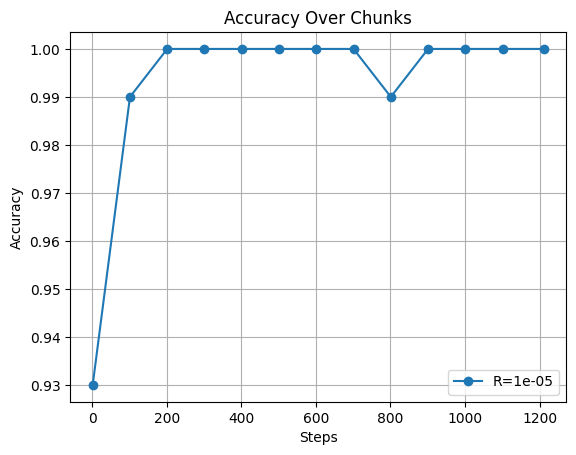

R_value=0.01: Accuracy for steps 1 - 100: 0.93
R_value=0.01: Accuracy for steps 101 - 200: 0.99
R_value=0.01: Accuracy for steps 201 - 300: 1.0
R_value=0.01: Accuracy for steps 301 - 400: 1.0
R_value=0.01: Accuracy for steps 401 - 500: 1.0
R_value=0.01: Accuracy for steps 501 - 600: 1.0
R_value=0.01: Accuracy for steps 601 - 700: 1.0
R_value=0.01: Accuracy for steps 701 - 800: 1.0
R_value=0.01: Accuracy for steps 801 - 900: 0.99
R_value=0.01: Accuracy for steps 901 - 1000: 1.0
R_value=0.01: Accuracy for steps 1001 - 1100: 1.0
R_value=0.01: Accuracy for steps 1101 - 1200: 1.0
R_value=0.01: Accuracy for steps 1201 - 1211: 1.0
Total reward for 'r'=0.01: 1076
Accuracy for 'r'=0.01: 0.8885218827415359


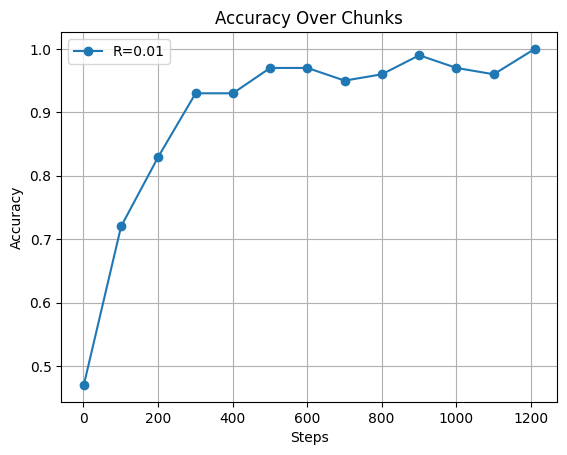

R_value=0.1: Accuracy for steps 1 - 100: 0.47
R_value=0.1: Accuracy for steps 101 - 200: 0.72
R_value=0.1: Accuracy for steps 201 - 300: 0.83
R_value=0.1: Accuracy for steps 301 - 400: 0.93
R_value=0.1: Accuracy for steps 401 - 500: 0.93
R_value=0.1: Accuracy for steps 501 - 600: 0.97
R_value=0.1: Accuracy for steps 601 - 700: 0.97
R_value=0.1: Accuracy for steps 701 - 800: 0.95
R_value=0.1: Accuracy for steps 801 - 900: 0.96
R_value=0.1: Accuracy for steps 901 - 1000: 0.99
R_value=0.1: Accuracy for steps 1001 - 1100: 0.97
R_value=0.1: Accuracy for steps 1101 - 1200: 0.96
R_value=0.1: Accuracy for steps 1201 - 1211: 1.0
Total reward for 'r'=0.1: 700
Accuracy for 'r'=0.1: 0.5780346820809249


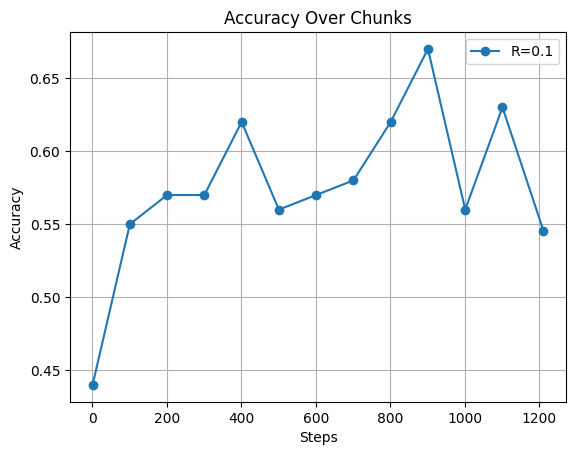

R_value=0.5: Accuracy for steps 1 - 100: 0.44
R_value=0.5: Accuracy for steps 101 - 200: 0.55
R_value=0.5: Accuracy for steps 201 - 300: 0.57
R_value=0.5: Accuracy for steps 301 - 400: 0.57
R_value=0.5: Accuracy for steps 401 - 500: 0.62
R_value=0.5: Accuracy for steps 501 - 600: 0.56
R_value=0.5: Accuracy for steps 601 - 700: 0.57
R_value=0.5: Accuracy for steps 701 - 800: 0.58
R_value=0.5: Accuracy for steps 801 - 900: 0.62
R_value=0.5: Accuracy for steps 901 - 1000: 0.67
R_value=0.5: Accuracy for steps 1001 - 1100: 0.56
R_value=0.5: Accuracy for steps 1101 - 1200: 0.63
R_value=0.5: Accuracy for steps 1201 - 1211: 0.5454545454545454
Total reward for 'r'=0.5: 598
Accuracy for 'r'=0.5: 0.49380677126341865


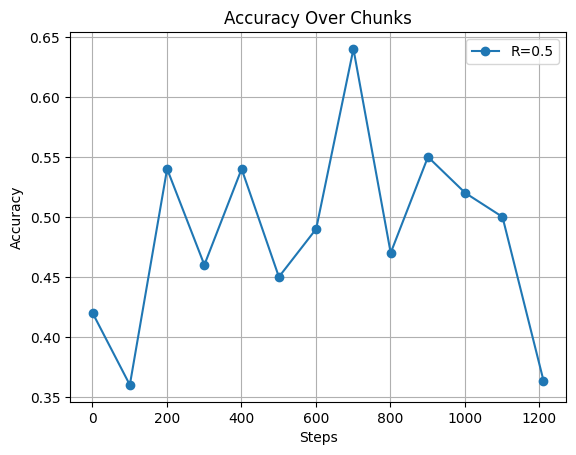

R_value=1.0: Accuracy for steps 1 - 100: 0.42
R_value=1.0: Accuracy for steps 101 - 200: 0.36
R_value=1.0: Accuracy for steps 201 - 300: 0.54
R_value=1.0: Accuracy for steps 301 - 400: 0.46
R_value=1.0: Accuracy for steps 401 - 500: 0.54
R_value=1.0: Accuracy for steps 501 - 600: 0.45
R_value=1.0: Accuracy for steps 601 - 700: 0.49
R_value=1.0: Accuracy for steps 701 - 800: 0.64
R_value=1.0: Accuracy for steps 801 - 900: 0.47
R_value=1.0: Accuracy for steps 901 - 1000: 0.55
R_value=1.0: Accuracy for steps 1001 - 1100: 0.52
R_value=1.0: Accuracy for steps 1101 - 1200: 0.5
R_value=1.0: Accuracy for steps 1201 - 1211: 0.36363636363636365
Total reward for 'r'=1.0: 638
Accuracy for 'r'=1.0: 0.5268373245251858


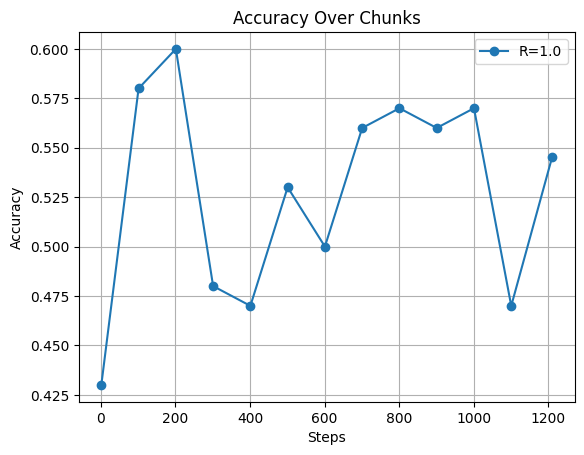

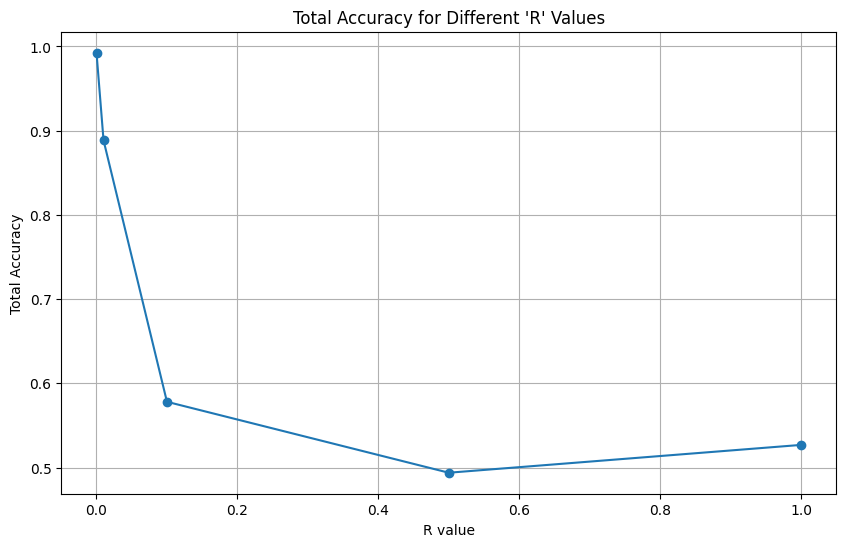

In [16]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

class ContextualThompsonSampling:
    def __init__(self, n_arms, n_features, delta=0.5,
                 R=0.01, epsilon=0.5, random_state=456):
        self.n_arms = n_arms
        self.n_features = n_features
        self.random_state = random_state
        self.n_features = n_features

        # 0 < delta < 1
        if not isinstance(delta, float):
            raise ValueError("delta should be float")
        elif (delta < 0) or (delta >= 1):
            raise ValueError("delta should be in (0, 1]")
        else:
            self.delta = delta

        # R > 0
        if not isinstance(R, float):
            raise ValueError("R should be float")
        elif R <= 0:
            raise ValueError("R should be positive")
        else:
            self.R = R

        # 0 < epsilon < 1
        if not isinstance(epsilon, float):
            raise ValueError("epsilon should be float")
        elif (epsilon < 0) or (epsilon > 1):
            raise ValueError("epsilon should be in (0, 1)")
        else:
            self.epsilon = epsilon

        self.A = [np.identity(n_features) for _ in range(n_arms)]
        self.b = [np.zeros(n_features) for _ in range(n_arms)]

    def select_arm(self, context):
        scores = np.zeros(self.n_arms)
        for arm in range(self.n_arms):
            A_inv = np.linalg.inv(self.A[arm])
            mu_hat = A_inv @ self.b[arm]
            v = self.R * np.sqrt(24 / self.epsilon
                             * self.n_features
                             * np.log(1 / self.delta))
            mu_tilde = np.random.multivariate_normal(
            mu_hat.flat, v**2 * (A_inv + A_inv.T) / 2)[..., np.newaxis]


            scores[arm] = context @ mu_tilde
        
        selected_arm = np.argmax(scores)
        return selected_arm

    def update(self, arm, context, reward):
        self.A[arm] += np.outer(context, context)
        self.b[arm] += reward * context
        
        
chosen_features = [
    "total_comp_time", "reach", "height", "age",
    "knockdowns", "sub_attempts", "reversals", "control",
    "takedowns_landed", "takedowns_attempts",
    "sig_strikes_landed", "sig_strikes_attempts",
    "total_strikes_landed", "total_strikes_attempts",
    "head_strikes_landed", "head_strikes_attempts",
    "body_strikes_landed", "body_strikes_attempts",
    "leg_strikes_landed", "leg_strikes_attempts",
    "distance_strikes_landed", "distance_strikes_attempts",
    "clinch_strikes_landed", "clinch_strikes_attempts",
    "ground_strikes_landed", "ground_strikes_attempts",
    "KO_losses", "days_since_last_comp", "lose_streak",
    "win_streak", "win_loss_ratio",
    "stamina", "num_fights", "trueskill", "elo"
]

# Iterate over different values of 'R'
R_values = [0.00001, 0.01, 0.1, 0.5, 1.0]  

num_fights = len(lightweight) // 2
num_features = len(chosen_features) * 2  # Features from both fighters

# Initialize variables to track accuracy in chunks
chunk_size = 100  # Define the size of each chunk for reporting accuracy
chunk_rewards = [0] * (num_fights // chunk_size + 1)  # List to hold rewards for each chunk
chunk_correct_predictions = [0] * (num_fights // chunk_size + 1)  # List to hold correct predictions count for each chunk

# List to store total accuracies for each epsilon value
total_accuracies = []

# Iterate over epsilon values
for R_value in R_values:
    cts = ContextualThompsonSampling(2, num_features, R=R_value)

    total_reward = 0
    correct_predictions = 0
    chunk_rewards = [0] * (num_fights // chunk_size + 1)
    chunk_correct_predictions = [0] * (num_fights // chunk_size + 1)

    for fight_index in range(num_fights):
        # Get the records for both fighters in the current fight
        fighter1_record = lightweight.iloc[fight_index * 2]
        fighter2_record = lightweight.iloc[fight_index * 2 + 1]

        # Convert features from both fighters to numeric types and handle non-numeric entries
        fighter1_features = pd.to_numeric(fighter1_record[chosen_features], errors='coerce').fillna(0)
        fighter2_features = pd.to_numeric(fighter2_record[chosen_features], errors='coerce').fillna(0)

        context = np.concatenate([fighter1_features, fighter2_features])

        # Use Contextual Thompson Sampling to recommend an arm (fighter)
        chosen_arm = cts.select_arm(context)

        # Determine the actual winner (arm 0 represents fighter 1 and arm 1 represents fighter 2)
        actual_winner = 0 if fighter1_record['result'] == 1 else 1

         # Reward is 1 if the chosen arm matches the actual winner, else 0
        reward = 1 if chosen_arm == actual_winner else 0

        # Update the model
        cts.update(chosen_arm, context, reward)

        winning_fighter = "name"
        if actual_winner == 0:
            winning_fighter = fighter1_record['fighter']
        else:
            winning_fighter = fighter2_record['fighter']

        # Determine the current chunk
        current_chunk = fight_index // chunk_size

        # Update rewards and correct predictions for the current chunk
        chunk_rewards[current_chunk] += reward
        if chosen_arm == actual_winner:
            chunk_correct_predictions[current_chunk] += 1

        # Track total reward and correct predictions
        total_reward += reward
        correct_predictions += (chosen_arm == actual_winner)
        
    # Calculate accuracy
    accuracy = correct_predictions / num_fights

    # Append accuracy to the list
    total_accuracies.append(accuracy)
    
    # Print accuracy for each chunk
    for i in range(len(chunk_rewards)):
        if (i + 1) * chunk_size <= num_fights:
            print(f"R_value={R_value}: Accuracy for steps {i * chunk_size + 1} - {(i + 1) * chunk_size}: {accuracies[i]}")
        else:
            print(f"R_value={R_value}: Accuracy for steps {i * chunk_size + 1} - {num_fights}: {accuracies[i]}")

    # Calculate accuracy
    accuracy = correct_predictions / num_fights
    print(f"Total reward for 'r'={R_value}: {total_reward}")
    print(f"Accuracy for 'r'={R_value}: {accuracy}")

    # Create x-axis values for the plot
    x_values = [i * chunk_size + 1 if (i + 1) * chunk_size <= num_fights
                else num_fights
                for i in range(len(chunk_rewards))]
    accuracies = [chunk_correct_predictions[i] / chunk_size if (i + 1) * chunk_size <= num_fights
                  else chunk_correct_predictions[i] / (num_fights - i * chunk_size)
                  for i in range(len(chunk_rewards))]
    plt.plot(x_values, accuracies, marker='o', linestyle='-', label=f'R={R_value}')
    # Show the plot
    plt.title('Accuracy Over Chunks')
    plt.xlabel('Steps')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()
    total_reward = 0
    correct_predictions = 0
    
# Plot total accuracies for each epsilon value
plt.figure(figsize=(10, 6))
plt.plot(R_values, total_accuracies, marker='o', linestyle='-')  # Use R_values instead of epsilon_values
plt.title("Total Accuracy for Different 'R' Values")
plt.xlabel('R value')
plt.ylabel('Total Accuracy')
plt.grid(True)
plt.show()

# Optimised model 
### most optimised variables delta=0.99999, R=0.00001, epsilon=0.99999 respectively

In [17]:
import numpy as np
import pandas as pd
import scipy.stats as stats

class ContextualThompsonSampling:
    def __init__(self, n_arms, n_features, delta=0.99999,
                 R=0.00001, epsilon=0.99999, random_state=456):
        self.n_arms = n_arms
        self.n_features = n_features
        self.random_state = random_state
        self.n_features = n_features

        # 0 < delta < 1
        if not isinstance(delta, float):
            raise ValueError("delta should be float")
        elif (delta < 0) or (delta >= 1):
            raise ValueError("delta should be in (0, 1]")
        else:
            self.delta = delta

        # R > 0
        if not isinstance(R, float):
            raise ValueError("R should be float")
        elif R <= 0:
            raise ValueError("R should be positive")
        else:
            self.R = R

        # 0 < epsilon < 1
        if not isinstance(epsilon, float):
            raise ValueError("epsilon should be float")
        elif (epsilon < 0) or (epsilon > 1):
            raise ValueError("epsilon should be in (0, 1)")
        else:
            self.epsilon = epsilon

        self.A = [np.identity(n_features) for _ in range(n_arms)]
        self.b = [np.zeros(n_features) for _ in range(n_arms)]

    def select_arm(self, context):
        scores = np.zeros(self.n_arms)
        for arm in range(self.n_arms):
            A_inv = np.linalg.inv(self.A[arm])
            mu_hat = A_inv @ self.b[arm]
            v = self.R * np.sqrt(24 / self.epsilon
                             * self.n_features
                             * np.log(1 / self.delta))
            mu_tilde = np.random.multivariate_normal(
            mu_hat.flat, v**2 * A_inv)[..., np.newaxis]

            scores[arm] = context @ mu_tilde
        
        selected_arm = np.argmax(scores)
        return selected_arm

    def update(self, arm, context, reward):
        self.A[arm] += np.outer(context, context)
        self.b[arm] += reward * context
        
# Assume 'lightweight' is a pandas DataFrame containing your data
# Assume 'chosen_features' is defined as the list of features for the fighters
chosen_features = [
    "total_comp_time", "reach", "height", "age",
    "knockdowns", "sub_attempts", "reversals", "control",
    "takedowns_landed", "takedowns_attempts",
    "sig_strikes_landed", "sig_strikes_attempts",
    "total_strikes_landed", "total_strikes_attempts",
    "head_strikes_landed", "head_strikes_attempts",
    "body_strikes_landed", "body_strikes_attempts",
    "leg_strikes_landed", "leg_strikes_attempts",
    "distance_strikes_landed", "distance_strikes_attempts",
    "clinch_strikes_landed", "clinch_strikes_attempts",
    "ground_strikes_landed", "ground_strikes_attempts",
    "KO_losses", "days_since_last_comp", "lose_streak",
    "win_streak", "win_loss_ratio",
    "stamina", "num_fights", "trueskill", "elo"
]

# Ensure 'result' column exists and indicates the winner (1 for the winner, 0 for the loser)

num_fights = len(lightweight) // 2
num_features = len(chosen_features) * 2  # Features from both fighters

# Initialize variables to track accuracy in chunks
chunk_size = 100  # Define the size of each chunk for reporting accuracy
chunk_rewards = [0] * (num_fights // chunk_size + 1)  # List to hold rewards for each chunk
chunk_correct_predictions = [0] * (num_fights // chunk_size + 1)  # List to hold correct predictions count for each chunk

# Create an instance of the ContextualThompsonSampling class
cts = ContextualThompsonSampling(2, num_features)

total_reward = 0
correct_predictions = 0

for fight_index in range(num_fights):
    # Get the records for both fighters in the current fight
    fighter1_record = lightweight.iloc[fight_index * 2]
    fighter2_record = lightweight.iloc[fight_index * 2 + 1]

    # Convert features from both fighters to numeric types and handle non-numeric entries
    fighter1_features = pd.to_numeric(fighter1_record[chosen_features], errors='coerce').fillna(0)
    fighter2_features = pd.to_numeric(fighter2_record[chosen_features], errors='coerce').fillna(0)

    context = np.concatenate([fighter1_features, fighter2_features])
    
    # Use Contextual Thompson Sampling to recommend an arm (fighter)
    chosen_arm = cts.select_arm(context)

    # Determine the actual winner (arm 0 represents fighter 1 and arm 1 represents fighter 2)
    actual_winner = 0 if fighter1_record['result'] == 1 else 1
    
     # Reward is 1 if the chosen arm matches the actual winner, else 0
    reward = 1 if chosen_arm == actual_winner else 0

    # Update the model
    cts.update(chosen_arm, context, reward)

    winning_fighter = "name"
    if actual_winner == 0:
        winning_fighter = fighter1_record['fighter']
    else:
        winning_fighter = fighter2_record['fighter']
        
    
    # Determine the current chunk
    current_chunk = fight_index // chunk_size
    
    # Update rewards and correct predictions for the current chunk
    chunk_rewards[current_chunk] += reward
    if chosen_arm == actual_winner:
        chunk_correct_predictions[current_chunk] += 1
    
    # Track total reward and correct predictions
    total_reward += reward
    correct_predictions += (chosen_arm == actual_winner)

# Print accuracy for each chunk
for i in range(len(chunk_rewards)):
    if (i + 1) * chunk_size <= num_fights:
        print(f"Accuracy for steps {i * chunk_size + 1} - {(i + 1) * chunk_size}: {chunk_correct_predictions[i] / chunk_size}")
    else:  # Handle the last chunk which might be smaller than chunk_size
        print(f"Accuracy for steps {i * chunk_size + 1} - {num_fights}: {chunk_correct_predictions[i] / (num_fights - i * chunk_size)}")
        
# Calculate accuracy
accuracy = correct_predictions / num_fights
print(f"Total reward: {total_reward}")
print(f"Accuracy: {accuracy}")

Accuracy for steps 1 - 100: 1.0
Accuracy for steps 101 - 200: 1.0
Accuracy for steps 201 - 300: 1.0
Accuracy for steps 301 - 400: 1.0
Accuracy for steps 401 - 500: 1.0
Accuracy for steps 501 - 600: 1.0
Accuracy for steps 601 - 700: 1.0
Accuracy for steps 701 - 800: 1.0
Accuracy for steps 801 - 900: 1.0
Accuracy for steps 901 - 1000: 1.0
Accuracy for steps 1001 - 1100: 1.0
Accuracy for steps 1101 - 1200: 1.0
Accuracy for steps 1201 - 1211: 1.0
Total reward: 1211
Accuracy: 1.0
